In [12]:
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

In [3]:
warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

studentsperformance_df_orignal = studentsperformance_df.copy()

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## Problem 1

In [56]:
studentsperformance_df_orignal

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


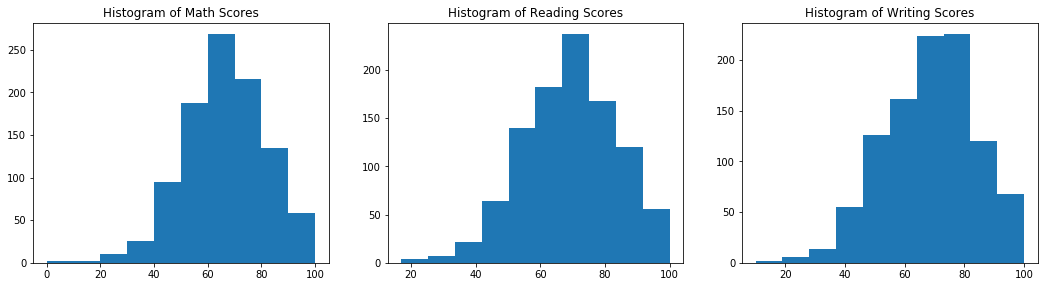

In [6]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(studentsperformance_df_orignal["math score"])
plt.title("Histogram of Math Scores")

plt.subplot(3, 3, 2)
plt.hist(studentsperformance_df_orignal["reading score"])
plt.title("Histogram of Reading Scores")

plt.subplot(3, 3, 3)
plt.hist(studentsperformance_df_orignal["writing score"])
plt.title("Histogram of Writing Scores")

plt.show()

In [54]:
norm_stats = normaltest((studentsperformance_df_orignal["math score"]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

norm_stats = normaltest((studentsperformance_df_orignal["reading score"]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

norm_stats = normaltest((studentsperformance_df_orignal["writing score"]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

The normality test statistic is 14.829070008237682 and the p-value is 0.000602432456595843
The normality test statistic is 11.11741279628622 and the p-value is 0.003853758403576582
The normality test statistic is 13.606450837263859 and the p-value is 0.0011101885439899974


This shows that the distributions are not normally distributed.

In [37]:
studentsperformance_df_orignal.at[59,'math score'] = 1

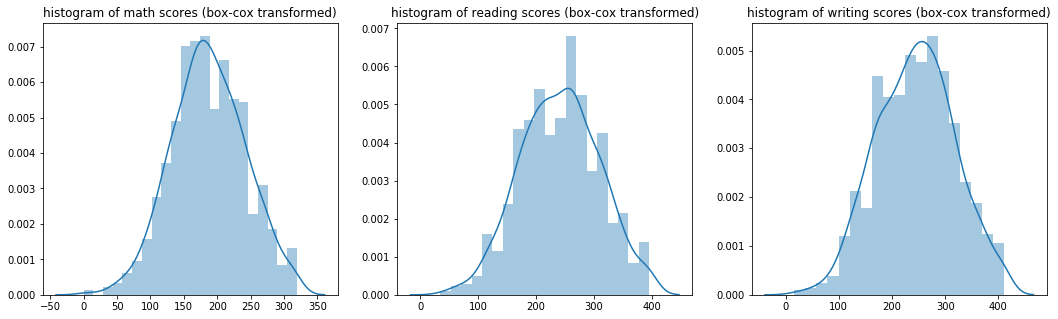

In [41]:

math_boxcox = boxcox(studentsperformance_df_orignal["math score"])
reading_boxcox = boxcox(studentsperformance_df_orignal["reading score"])
writing_boxcox = boxcox(studentsperformance_df_orignal["writing score"])

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
sns.distplot(math_boxcox[0])
plt.title("histogram of math scores (box-cox transformed)")

plt.subplot(1, 3, 2)
sns.distplot(reading_boxcox[0])
plt.title("histogram of reading scores (box-cox transformed)")

plt.subplot(1, 3, 3)
sns.distplot(writing_boxcox[0])
plt.title("histogram of writing scores (box-cox transformed)")

plt.show()

In [55]:
norm_stats = normaltest((math_boxcox[0]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

norm_stats = normaltest((reading_boxcox[0]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

norm_stats = normaltest((writing_boxcox[0]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

The normality test statistic is 0.9034195001197268 and the p-value is 0.6365388982921865
The normality test statistic is 5.282274606965809 and the p-value is 0.07128015626992971
The normality test statistic is 6.267311355052559 and the p-value is 0.04355827085003712


The overall distribution is now now normal excluding the writing boxcox with a significance level of 5%. The Jarque Bera test was not used for these distributions because the sample sizes need to be greater than 2000 (ours is only 1000).

## Problem 2

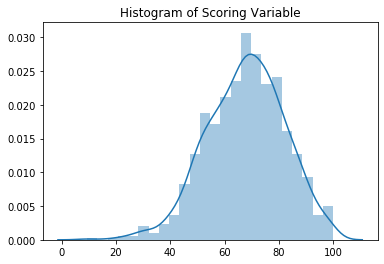

The normality test statistic is 15.039484104419722 and the p-value is 0.0005422724257804356


In [57]:
score_var = (studentsperformance_df_orignal["math score"] + studentsperformance_df_orignal["reading score"] + studentsperformance_df_orignal["writing score"])/3

sns.distplot(score_var)
plt.title("Histogram of Scoring Variable")

plt.show()

norm_stats = normaltest((score_var))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

This new single variable is not normally distributed.

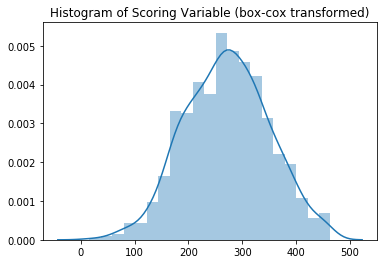

The normality test statistic is 2.802994172232588 and the p-value is 0.2462280632575158


In [58]:
scor_var_boxcox = boxcox(score_var)

sns.distplot(scor_var_boxcox[0])
plt.title("Histogram of Scoring Variable (box-cox transformed)")

plt.show()

norm_stats = normaltest((scor_var_boxcox[0]))
print('The normality test statistic is {} and the p-value is {}'.format(norm_stats[0],norm_stats[1]))

It is now normal with a p-value over 5%.

## Problem 3

In [63]:
studentsperformance_df_orignal.insert(8,'Scoring Variable', score_var)

In [65]:
studentsperformance_df_orignal.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Scoring Variable
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


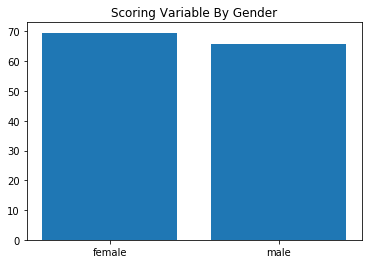

In [72]:
plt.bar(studentsperformance_df_orignal.groupby('gender').mean()['Scoring Variable'].index,studentsperformance_df_orignal.groupby('gender').mean()['Scoring Variable'])
plt.title('Scoring Variable By Gender')
plt.show()

Females tend to score slightly better accroding to our Scoring Variable index.

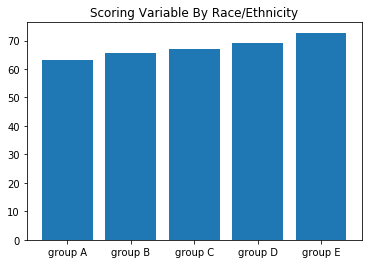

In [73]:
plt.bar(studentsperformance_df_orignal.groupby('race/ethnicity').mean()['Scoring Variable'].index,studentsperformance_df_orignal.groupby('race/ethnicity').mean()['Scoring Variable'])
plt.title('Scoring Variable By Race/Ethnicity')
plt.show()

There is an obvious difference in between groups with group A scoring the lowest and group E being the highest.

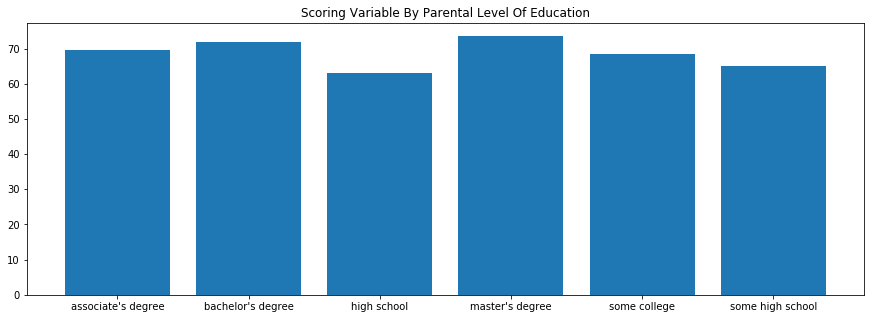

In [76]:
plt.figure(figsize = (15,5))

plt.bar(studentsperformance_df_orignal.groupby('parental level of education').mean()['Scoring Variable'].index,studentsperformance_df_orignal.groupby('parental level of education').mean()['Scoring Variable'])
plt.title('Scoring Variable By Parental Level Of Education')
plt.show()

The level of education of the parents seem to affect the student's scores. Master's degrees receive the highest with high school being the lowest.

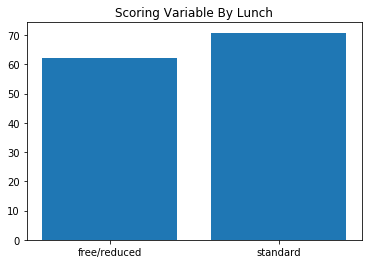

In [77]:
plt.bar(studentsperformance_df_orignal.groupby('lunch').mean()['Scoring Variable'].index,studentsperformance_df_orignal.groupby('lunch').mean()['Scoring Variable'])
plt.title('Scoring Variable By Lunch')
plt.show()

The standard lunch exceed that of the free/reduced lunch students. This goes back to the idea that students that come from families that can afford the standard lunch might be more prepared for these tests than the other students.

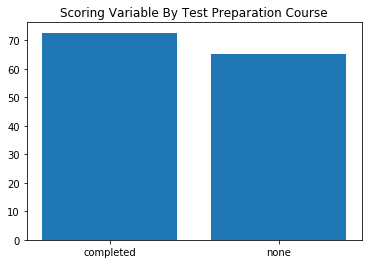

In [78]:
plt.bar(studentsperformance_df_orignal.groupby('test preparation course').mean()['Scoring Variable'].index,studentsperformance_df_orignal.groupby('test preparation course').mean()['Scoring Variable'])
plt.title('Scoring Variable By Test Preparation Course')
plt.show()

The students that completed the preparation course faired better on the test than the students who did not.